En este ejemplo intentaré implementar un ejemplo de propagación de información a través de un grafo

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.gnm_random_graph(100,250)
pos = nx.spring_layout(G)

color_map = []
wr = np.zeros(len(G)); wr[0]=1
wg = np.zeros(len(G)); wg[1]=1
wb = np.zeros(len(G)); wb[2]=1
pr = np.zeros(len(G)); pr[0]=1
pg = np.zeros(len(G)); pg[1]=1
pb = np.zeros(len(G)); pb[2]=1


for node in G:
    color_map.append('#%02x%02x%02x' % (int(wr[node]*255), int(wg[node]*255), int(wb[node]*255)))
    
plt.figure(3,figsize=(8,8))
nx.draw(G, pos, node_color=color_map, node_size=100, edge_color="gray" )
plt.show()
current_nodes = [0,1,2]

ModuleNotFoundError: No module named 'networkx'

La información de los nodos verde rojo y azul se propagará hacia los nodos adyacentes

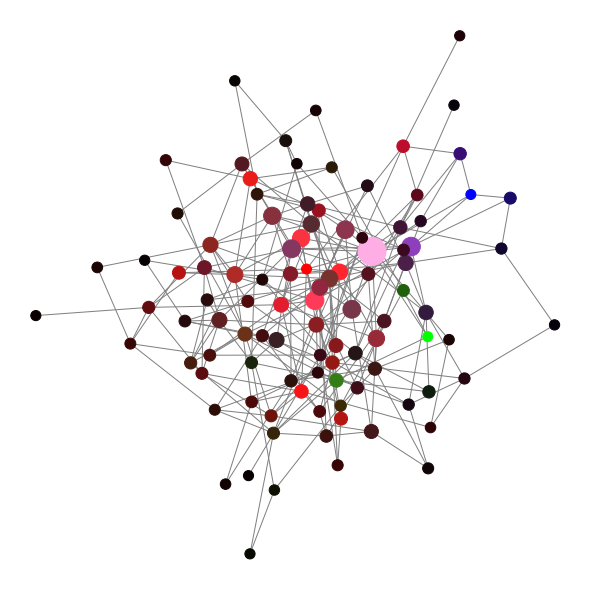

In [503]:
for i in range(0,5):
    ppr = np.zeros(len(G));
    ppg = np.zeros(len(G));
    ppb = np.zeros(len(G));
    for node in G:
        for n in G.neighbors(node):
            ppr[n] += pr[node]*0.25 # lo que se propaga
            ppg[n] += pg[node]*0.25 # lo que se propaga
            ppb[n] += pb[node]*0.25 # lo que se propaga
            if n not in [0,1,2]:
                wr[n] = np.minimum(1.0, wr[n] + pr[node]*0.25)
                wg[n] = np.minimum(1.0, wg[n] + pg[node]*0.25)
                wb[n] = np.minimum(1.0, wb[n] + pb[node]*0.25)
        pr[node] = 0.0

    pr=ppr; pg=ppg; pb=ppb


color_map = []
for node in G:
    r = wr[node]*255
    b = wb[node]*255
    g = wg[node]*255
    
    color_map.append('#%02x%02x%02x' % (int(r), int(g), int(b)))
    
node_size=[50] * len(G)
max_factor=0.0

for node in G:
    node_size[node]=int(np.min([wr[node],wg[node],wb[node]])*1000)+100
                   

plt.figure(3,figsize=(8,8))
nx.draw(G, pos, node_color=color_map, node_size=node_size, edge_color="gray") 
plt.show()

El color de los nodos indica tiene relación con la información recibida, mientras que mientras más grande, más información recibió de los 3 nodos de partida